This project explores and clusters user behaviour based on social media interaction data, including comments, likes, messages and content categories. The goal is to segment users into meaningful groups using unsupervised learning techniques such as KMeans and DBSCAN.

# Importing Important Libraries for Analysis

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading the Social Media Dataset

In [5]:
#We load the dataset and store it in a DataFrame called scm for further analysis.
scm = pd.read_csv("Social Media Dataset.csv")

In [6]:
scm.head()
#displays the first five rows of the dataframe

,User_ID,Age,Gender,Location,Language Preference,Content_Category,Likes,Comments,Share,Number of Posts,Average Messages Sent/ Day,Day Most Active,Avg Hours Spent Jan,Avg Hours Spent Feb,Avg Hours Spent Mar
0,XXX1,25,Male,USA,English,Business & Finance,69,80.0,52,31,20.0,Tuesday,21.5,16.3,1.0
1,XXX2,34,Female,UK,English,Politics,90,70.0,9,6,10.0,Friday,16.8,22.1,6.2
2,XXX3,28,Male,Canada,French,Politics,141,239.0,21,61,5.0,Monday,20.8,5.3,10.6
3,XXX4,32,Male,Ghana,English,Sports,200,212.0,17,15,4.0,Thursday,12.7,16.9,21.2
4,XXX5,46,Female,Germany,German,Education,60,101.0,31,40,2.0,Tuesday,14.8,9.6,19.4


# Exploratory Data Analysis

In [8]:
scm.shape
#displays the number of rows and columns in the dataset

(100, 15)

In [9]:
scm.info()
#This provides the number of non-null values and data types for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     100 non-null    object 
 1   Age                         100 non-null    int64  
 2   Gender                      100 non-null    object 
 3   Location                    100 non-null    object 
 4   Language Preference         100 non-null    object 
 5   Content_Category            98 non-null     object 
 6   Likes                       100 non-null    int64  
 7   Comments                    98 non-null     float64
 8   Share                       100 non-null    int64  
 9    Number of Posts            100 non-null    int64  
 10  Average Messages Sent/ Day  99 non-null     float64
 11  Day Most Active             100 non-null    object 
 12  Avg Hours Spent Jan         100 non-null    float64
 13  Avg Hours Spent Feb         100 non-

In [10]:
scm.describe()
#gives statistical analysis of the dataframe on numerical columns

,Age,Likes,Comments,Share,Number of Posts,Average Messages Sent/ Day,Avg Hours Spent Jan,Avg Hours Spent Feb,Avg Hours Spent Mar
count,100.000000,100.000000,98.000000,100.000000,100.000000,99.000000,100.000000,100.00000,100.000000
mean,40.050000,94.030000,118.755102,34.570000,37.690000,3.595960,11.524000,11.90100,11.361000
std,15.862652,57.691176,71.168750,19.769508,22.196867,2.831741,6.008027,6.13981,7.323463
min,15.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.20000,0.300000
25%,27.000000,49.750000,62.000000,17.000000,19.000000,2.000000,6.800000,6.30000,4.525000
50%,40.500000,96.500000,112.000000,34.000000,37.500000,4.000000,10.600000,11.80000,10.650000
75%,54.000000,141.750000,177.750000,53.000000,53.500000,5.000000,16.425000,16.80000,18.150000
max,67.000000,200.000000,239.000000,68.000000,79.000000,20.000000,22.700000,22.80000,23.500000


#Handling Missing Values


In [12]:
scm.isnull().sum()
#displays the sum of missing values in each column.

User_ID                       0
Age                           0
Gender                        0
Location                      0
Language Preference           0
Content_Category              2
Likes                         0
Comments                      2
Share                         0
 Number of Posts              0
Average Messages Sent/ Day    1
Day Most Active               0
Avg Hours Spent Jan           0
Avg Hours Spent Feb           0
Avg Hours Spent Mar           0
dtype: int64

From the code, we observe that three columns have null values. We need to fill these null spaces to improve analysis.

In [14]:
scm['Content_Category'] = scm['Content_Category'].fillna(scm['Content_Category'].mode()[0]) 

#we filled the null values in the 'Content Category' column with the top most occuring value. We used mode as it is appropriate for filling null values in a categorical columns 

In [16]:
scm['Comments'] = scm['Comments'].fillna(round(scm['Comments'].mean())).astype(int)
scm['Average Messages Sent/ Day'] = scm['Average Messages Sent/ Day'].fillna(round(scm['Average Messages Sent/ Day'].mean())).astype(int)

#Here we filled the null spaces in 'Comments' and 'Average Messages Sent/Day' with the mean values of that column and converted the datatypes of the columns into integer type. We used mean to fill the null values as the columns are numerical with continuous values

In [18]:
scm.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Location                      0
Language Preference           0
Content_Category              0
Likes                         0
Comments                      0
Share                         0
 Number of Posts              0
Average Messages Sent/ Day    0
Day Most Active               0
Avg Hours Spent Jan           0
Avg Hours Spent Feb           0
Avg Hours Spent Mar           0
dtype: int64

All null values in the dataframe have been filled.

In [20]:
scm.head()

,User_ID,Age,Gender,Location,Language Preference,Content_Category,Likes,Comments,Share,Number of Posts,Average Messages Sent/ Day,Day Most Active,Avg Hours Spent Jan,Avg Hours Spent Feb,Avg Hours Spent Mar
0,XXX1,25,Male,USA,English,Business & Finance,69,80,52,31,20,Tuesday,21.5,16.3,1.0
1,XXX2,34,Female,UK,English,Politics,90,70,9,6,10,Friday,16.8,22.1,6.2
2,XXX3,28,Male,Canada,French,Politics,141,239,21,61,5,Monday,20.8,5.3,10.6
3,XXX4,32,Male,Ghana,English,Sports,200,212,17,15,4,Thursday,12.7,16.9,21.2
4,XXX5,46,Female,Germany,German,Education,60,101,31,40,2,Tuesday,14.8,9.6,19.4


In [21]:
scm.info()
#We can see the changes we made has been effected.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     100 non-null    object 
 1   Age                         100 non-null    int64  
 2   Gender                      100 non-null    object 
 3   Location                    100 non-null    object 
 4   Language Preference         100 non-null    object 
 5   Content_Category            100 non-null    object 
 6   Likes                       100 non-null    int64  
 7   Comments                    100 non-null    int32  
 8   Share                       100 non-null    int64  
 9    Number of Posts            100 non-null    int64  
 10  Average Messages Sent/ Day  100 non-null    int32  
 11  Day Most Active             100 non-null    object 
 12  Avg Hours Spent Jan         100 non-null    float64
 13  Avg Hours Spent Feb         100 non-

# Visualisations

We visualise some columns to find their relationships with each other

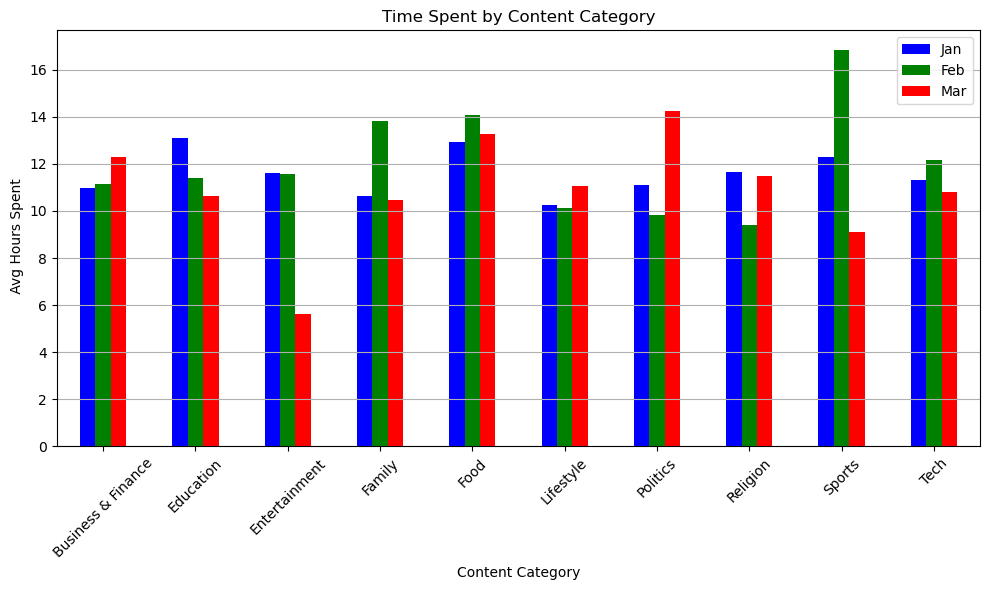

In [24]:
plot_scm = scm.groupby("Content_Category")[['Avg Hours Spent Jan', "Avg Hours Spent Feb", 'Avg Hours Spent Mar']].mean()

plot_scm.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'red'])
plt.title("Time Spent by Content Category")
plt.xlabel("Content Category")
plt.ylabel(" Avg Hours Spent")
plt.xticks(rotation=45)
plt.legend(["Jan", "Feb", 'Mar'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#From this bar plot, we can see which Content Category was popular among which months. e.g We can see from the plot that Sports was the most popular Content Category in the month of February. We can also see which Category of Contents are less sought after.

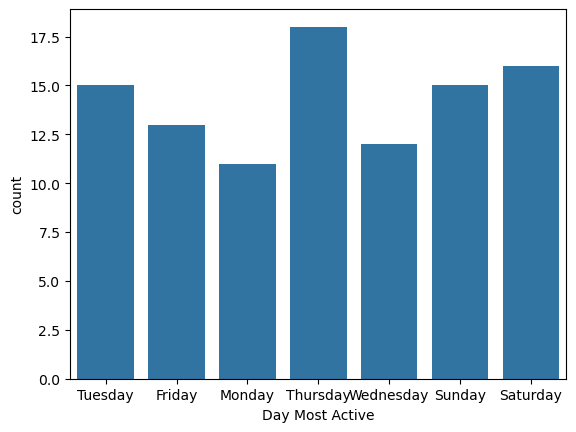

In [26]:
sns.countplot(x=scm['Day Most Active'], data=scm)
plt.show()

#The plot shows the days most users are active. We can see from the countplot that Thursday was the day most users were active. The same could be shown by making a value count on the 'Day Most Active' column as seen below.

In [28]:
scm['Day Most Active'].value_counts()

Day Most Active
Thursday     18
Saturday     16
Tuesday      15
Sunday       15
Friday       13
Wednesday    12
Monday       11
Name: count, dtype: int64

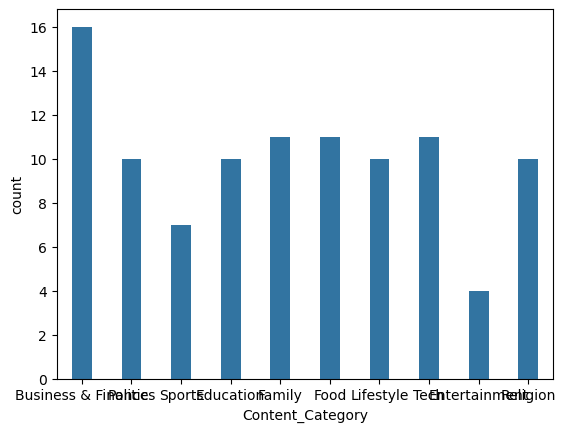

In [29]:
sns.countplot(x=scm['Content_Category'], data=scm, gap=0.5)
plt.show()
#We find the most engaged with Content Category by counting the most times they appeared in the dataset.

# Outlier Detection

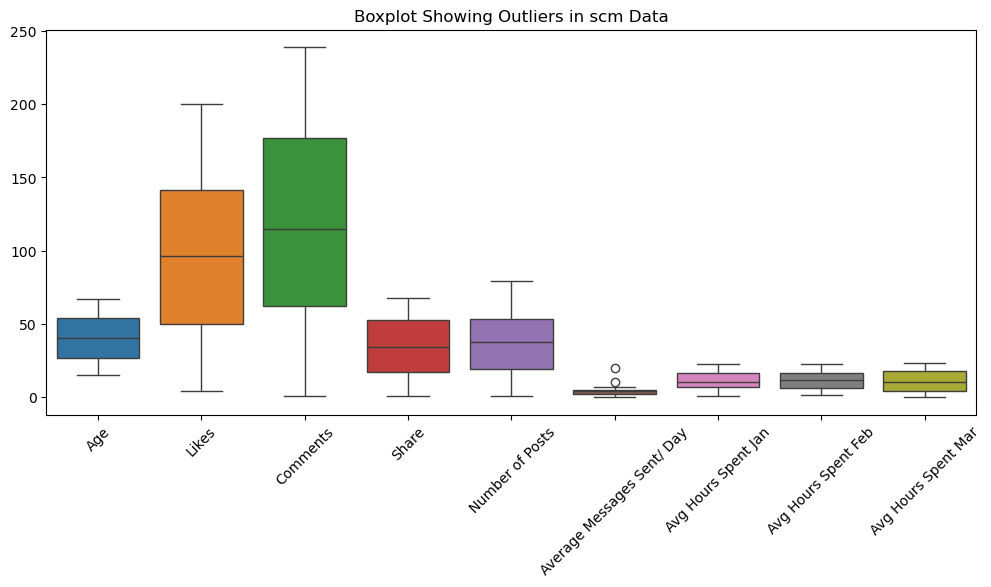

In [31]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=scm)
plt.xticks(rotation=45)
plt.title("Boxplot Showing Outliers in scm Data")
plt.show()
#We used boxplot to visualise the outliers that are found in the dataframe

In [32]:
#We can write out a function to also detect outliers by finding values above or below the quantile range of each column.
#We create a new variable including all columns in the dataframe which contain numerical values
scm_numerical_columns = scm.select_dtypes(include=['number'])

#We set the range for the lowest point and the highest point, below or above which points found are considered outliers.
Q1 = scm_numerical_columns.quantile(0.25) #lowest point of the range
Q3 = scm_numerical_columns.quantile(0.75) #highest point of the range
IQR = Q3 - Q1

#identifies outliers
outliers = ((scm_numerical_columns < (Q1 - 1.5 * IQR)) | (scm_numerical_columns > (Q3 + 1.5 * IQR))).any(axis=1)

#displays number of outliers
print(f"Number of outliers detected: {outliers.sum()}")

Number of outliers detected: 2


In [33]:
print(scm['Average Messages Sent/ Day'].nlargest(2))

0    20
1    10
Name: Average Messages Sent/ Day, dtype: int32


From the boxplot and the written function, we found 2 outliers found in 'Average Messages Sent/ Day' column. After dispalying the outliers, we can consider them not to be outliers but rather larger values in that variable. Average Messases sent by a person could be 10 or 20  or 5 or another value depending on how much users engage the social media platform for messaging other users.

#This notebook successfully cleaned and prepared a social media dataset, handled nulls, and laid the foundation for unsupervised clustering. The data is now ready for applying algorithms like KMeans or DBSCAN to identify behavioural user segments.

# Clustering

This step we cluster the dataset based on Likes and Comments. We use Hierarchichal Clustering, KMeans and DBSCAN to group the data into 3 clusters

In [38]:
#importing the necessary Clustering algorithms
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [39]:
F= scm[['Likes', 'Comments']]
#we will cluster the dataset based on 'F' which contains 'Likes' and 'Comments' of the users.

In [40]:
F.head()

,Likes,Comments
0,69,80
1,90,70
2,141,239
3,200,212
4,60,101


#KMeans

C:\Users\rushd\anaconda3\anacc\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rushd\anaconda3\anacc\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rushd\anaconda3\anacc\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rushd\anaconda3\anacc\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have

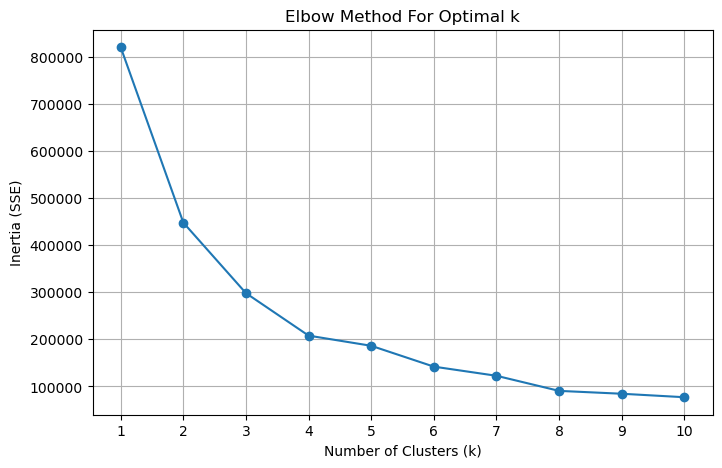

In [42]:
#We first run KMeans for different values of k and record inertia (SSE). We want to discover the optimal number of clusters suitable for the dataset.
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(F)  
    inertia.append(km.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

#From the graph, we observe that 3 labels is optimal for clustering the dataset.

In [44]:
#Fitting the model on the data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(F)

#Including the kMeans labels to scm dataframe
scm['KMeans_Cluster'] = kmeans_labels

C:\Users\rushd\anaconda3\anacc\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
kmeans_labels

array([1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0,
       1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2,
       1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2,
       1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1])

In [46]:
scm['KMeans_Cluster'].unique()
#displays the unique labels assigned to each cluster by KMeans

array([1, 0, 2])

In [47]:
#We can see the centroids with which the clusters were grouped
centroids = kmeans.cluster_centers_
centroids

array([[101.        , 196.59459459],
       [ 48.71052632,  69.55263158],
       [152.6       ,  78.36      ]])

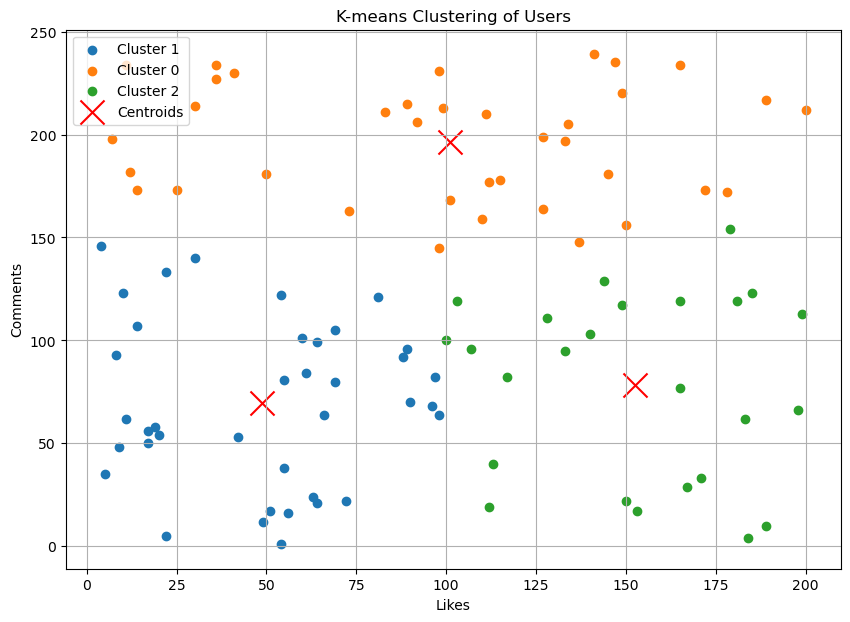

In [48]:
#Visualising the clusters made by KMeans and the centroids
plt.figure(figsize=(10, 7))
for cluster_label in scm['KMeans_Cluster'].unique():
    cluster_data = scm[scm['KMeans_Cluster'] == cluster_label]
    plt.scatter(cluster_data['Likes'], cluster_data['Comments'], label=f'Cluster {cluster_label}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('K-means Clustering of Users')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.legend()
plt.grid(True)
plt.show()

#Hierarchical Clustering

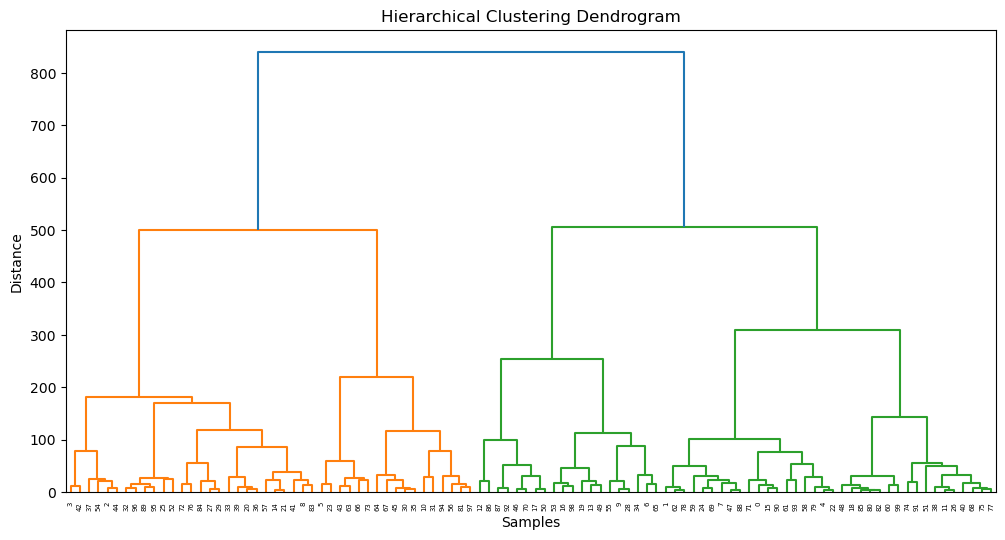

In [50]:
#Applying Hierarchical Clustering
linked = linkage(F, method='ward')

#Plotting Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

#Assigning 3 clusters
hierarchical_labels = fcluster(linked, 3, criterion='maxclust')
scm['Hierarchical_Cluster'] = hierarchical_labels


In [51]:
hierarchical_labels

array([3, 3, 1, 1, 3, 1, 2, 3, 1, 2, 1, 3, 2, 2, 1, 3, 2, 2, 3, 2, 1, 1,
       3, 1, 3, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3, 1, 1, 1,
       1, 1, 2, 3, 3, 2, 2, 3, 1, 2, 1, 2, 1, 1, 3, 3, 3, 3, 3, 1, 1, 2,
       1, 1, 3, 3, 2, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 2, 2,
       3, 1, 3, 3, 2, 3, 1, 1, 1, 1, 2, 3], dtype=int32)

In [52]:
scm['Hierarchical_Cluster'].unique()
#displays the unique labels assigned to each cluster by Hierarchical Clustering model

array([3, 1, 2])

#DBSCAN

In [54]:
#Fitting the model on the dataset
dbscan = DBSCAN(eps=30, min_samples=6)
dbscan_labels = dbscan.fit_predict(F)

#Including the DBSCAN labels to the scm dataframe
scm['DBSCAN_Cluster'] = dbscan_labels

In [55]:
dbscan_labels

array([ 0,  0,  0, -1,  0, -1, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  1,  0,  0,  0,
       -1,  1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  1, -1,  0,  0,  0, -1,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  1, -1, -1,  1,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0, -1,  0,  1,  0,  0, -1,  0,  0],
      dtype=int64)

In [56]:
#displays the unique labels assigned to each cluster by DBSCAN
scm['DBSCAN_Cluster'].unique()

array([ 0, -1,  1], dtype=int64)

In [57]:
scm.head()
#the labels for all 3 models have been successfully added to the dataframe

,User_ID,Age,Gender,Location,Language Preference,Content_Category,Likes,Comments,Share,Number of Posts,Average Messages Sent/ Day,Day Most Active,Avg Hours Spent Jan,Avg Hours Spent Feb,Avg Hours Spent Mar,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,XXX1,25,Male,USA,English,Business & Finance,69,80,52,31,20,Tuesday,21.5,16.3,1.0,1,3,0
1,XXX2,34,Female,UK,English,Politics,90,70,9,6,10,Friday,16.8,22.1,6.2,1,3,0
2,XXX3,28,Male,Canada,French,Politics,141,239,21,61,5,Monday,20.8,5.3,10.6,0,1,0
3,XXX4,32,Male,Ghana,English,Sports,200,212,17,15,4,Thursday,12.7,16.9,21.2,0,1,-1
4,XXX5,46,Female,Germany,German,Education,60,101,31,40,2,Tuesday,14.8,9.6,19.4,1,3,0


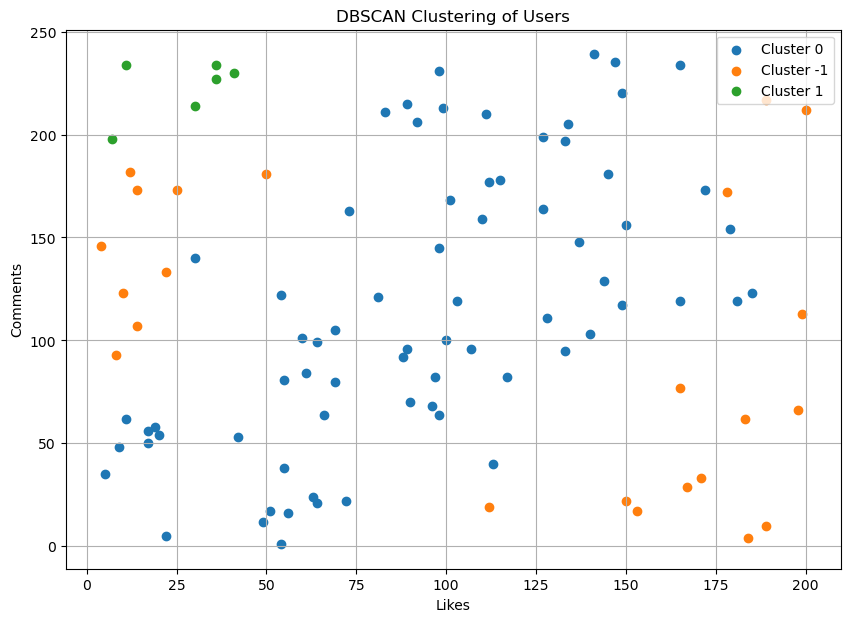

In [58]:
#Visualising the clusters made by DBSCAN
plt.figure(figsize=(10, 7))
for cluster_label in scm['DBSCAN_Cluster'].unique():
    cluster_data = scm[scm['DBSCAN_Cluster'] == cluster_label]
    plt.scatter(cluster_data['Likes'], cluster_data['Comments'], label=f'Cluster {cluster_label}')
plt.title('DBSCAN Clustering of Users')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation of the Clustering Models

We evaluate the performance of the three models with silhouette score for KMeans and Hierarchical Clustering and Davies Bouldin score for DBSCAN.

In [61]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(F, kmeans_labels)
print("K-Means Silhouette Score:", silhouette_kmeans)

K-Means Silhouette Score: 0.38877833114681737


In [62]:
from sklearn.metrics import davies_bouldin_score
filtered_features = F[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]

if len(set(filtered_labels)) > 1: 
    dbi_score = davies_bouldin_score(filtered_features, filtered_labels)
    print("DBSCAN Davies-Bouldin Index:", dbi_score)
else:
    print("Not enough clusters for Davies-Bouldin Index")


DBSCAN Davies-Bouldin Index: 0.7117315610078117


In [63]:
from sklearn.metrics import silhouette_score
silhouette_hierarchical = silhouette_score(F, hierarchical_labels)
print(silhouette_hierarchical)

0.35984925735159284


#Davies- Bouldin score was used to evaluate the DBSCAN model. It is a similar metric to the silhouette score.
It evaluates clusters by calculating compactness of clusters which is how close the data points within a cluster are to each other,
and separation, how different clusters are from each other.
A lower score indicates good clustering while a higher Davies- Bouldin score indicates poor clustering.

#K-Means and Hierarchical Clustering were evaluated using the silhouette score.
Silhouette score measures how similar each data point is to its own cluster compared to other clusters.
It calculates cohesion, similarity of other data points in one cluster and Separation, how different clusters are from each other.
A silhouette score close to -1 signifies poor clustering,
a score close to 1 signifies that the data points are well-clustered
and a score around 0 suggests data points are on the border between two clusters with unclear distinction.

#Evaluating our DBSCAN model, we had a Davies- Bouldin score of 0.7117.
this score is close to 0 and can be considered as a relatively low score which might indicate somewhat good clustering.

#K-Means model had a score of 0.3887 and can be justified as some of the data points of particular clusters were on the border of different clusters as seen in its visualisation.

#Hierarchical Clustering model had a score of 0.3598 and can also be considered as an almost well-clustered model.